# Animate step of understanding image

Reload package for each run (for testing)

In [1]:
%load_ext autoreload
%autoreload 2

Package import

In [2]:
import os,cv2
import numpy as np, pylab as plt
import skimage.transform as sktf

from utils_math import GRID_GEN

Importing pretrained models

In [9]:
from models_import import caption_model, process_caption

Exemple

[INFO] Starting System...
[INFO] Calculation type : cpu
[INFO] Importing vocabulary..
[INFO] Importing pretrained model (Datasets : ImageNet for encoder, Flicker8k for decoder)..
[INFO] Importing pretrained success
[INFO] Importing torch model..
[INFO] Affect state in torch model..
[INFO] Torch model ready to use !
[INFO] Importing image..
[INFO] Prepare image for neural network model..
[INFO] Define checkpoint of intermediate result layer..
[INFO] Processing neural network model..
[INFO] Saving checkpoint..
[INFO] Processing done !
[INFO] Results : a woman in a yellow jacket is standing on a rock wall with his arms outstretched . 


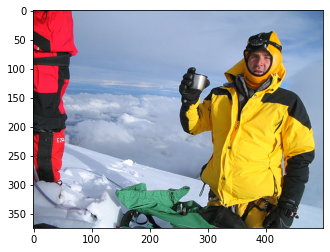

In [10]:
## Path
MODEL_DIR = 'saved_models/resnet101_attention-embed_lstm/'
MODEL_NAME = 'resnet101_attention-embed_lstm_best-train.pt'
INPUT_DIR = 'input/'
## import model
model, word2idx, idx2word = caption_model(MODEL_DIR,MODEL_NAME)
## exemple
img_list = os.listdir(INPUT_DIR)
img_name = np.random.choice(img_list)
image_path = INPUT_DIR + img_name
print('[INFO] Importing image..')
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
## apply
encod_out, inter_out, capidx, alpha, caption_pred = process_caption(image, model, word2idx, idx2word)
print('[INFO] Results : ' + caption_pred)
plt.imshow(image); plt.show()

Intermediate encoder layers result

In [5]:
for i,array in inter_out :
    idxmax = np.argsort(array[0].sum(axis=(1,2)).numpy())[::-1]
    print(idxmax[:10])
    shape = array.numpy()[0].shape
    grid = GRID_GEN(shape[0])[1]
    print(shape[1]/shape[2])
    img_complete = array.numpy().reshape((shape[1]*grid[0], shape[2]*grid[1]))
    img_complete = cv2.resize(img_complete, (375*2,1000), interpolation = cv2.INTER_AREA)
    cv2.imshow(window_name, img_complete)
    cv2.waitKey(0) == ord('q')
# free memory
cv2.destroyAllWindows()

[63 60 51 25 14 52 30 33 20 45]
0.752


NameError: name 'window_name' is not defined

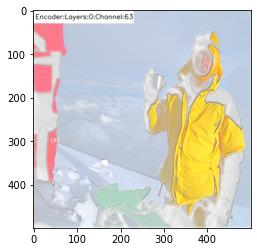

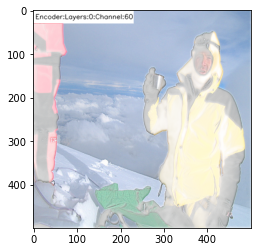

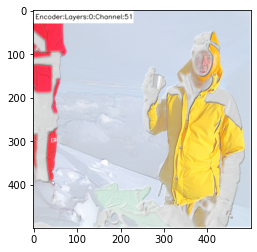

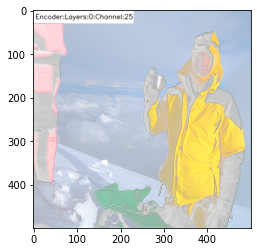

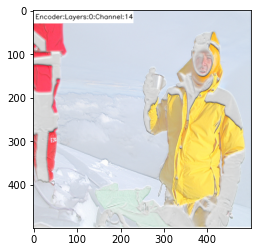

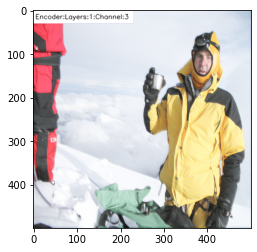

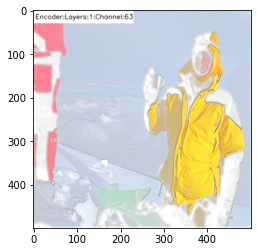

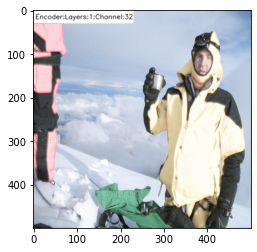

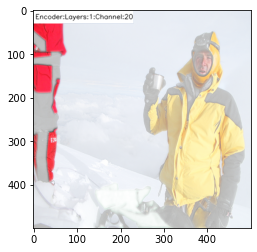

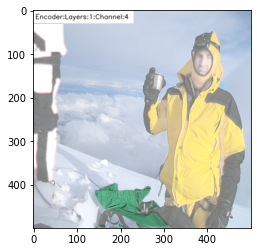

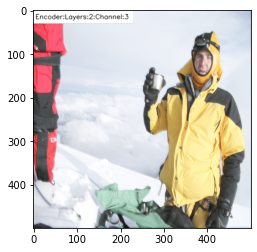

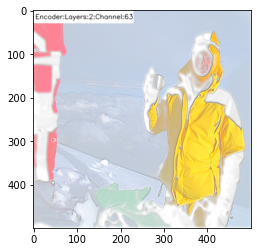

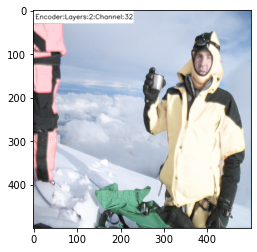

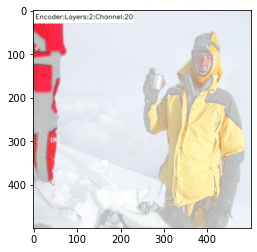

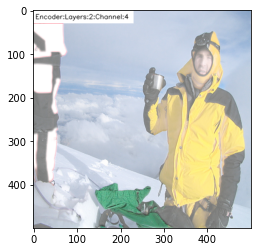

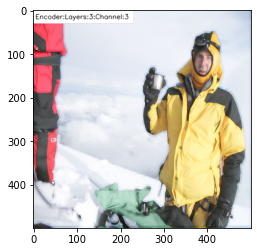

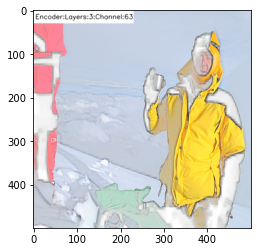

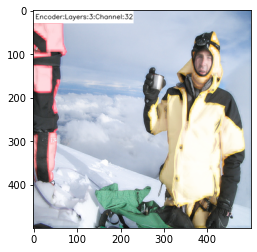

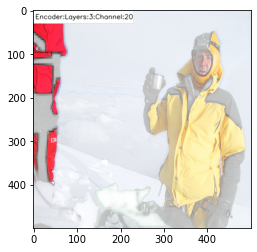

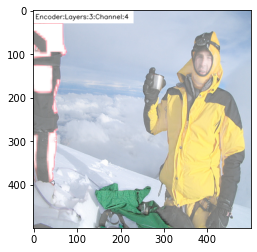

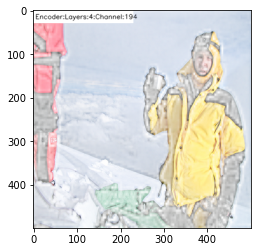

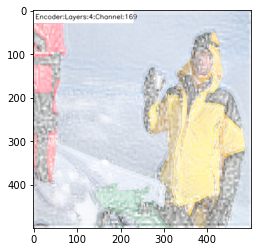

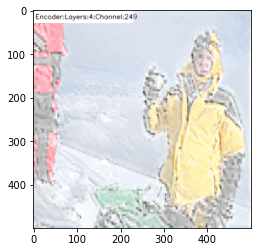

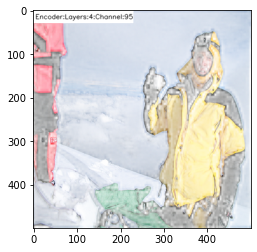

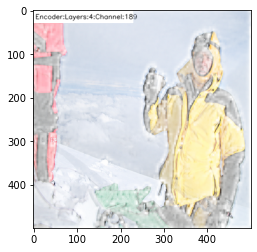

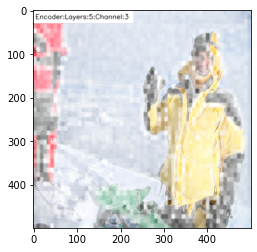

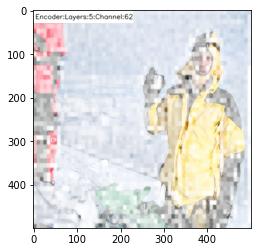

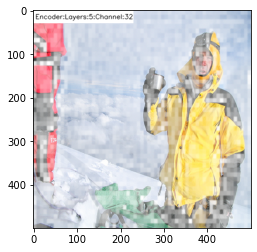

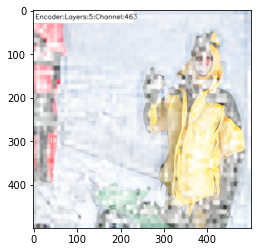

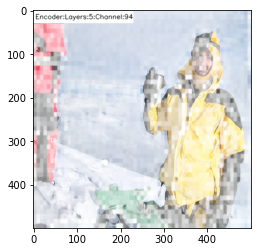

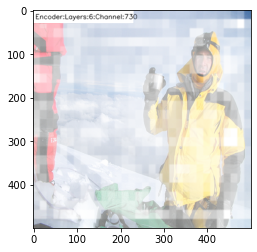

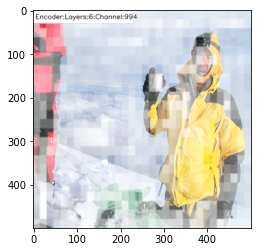

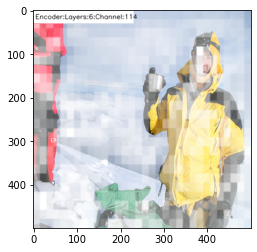

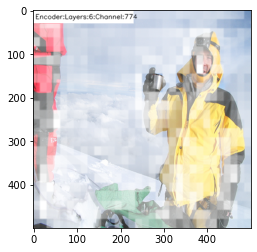

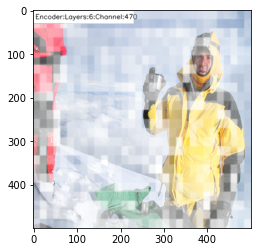

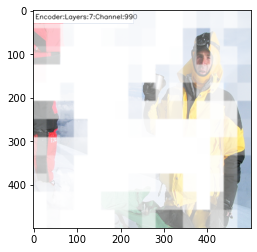

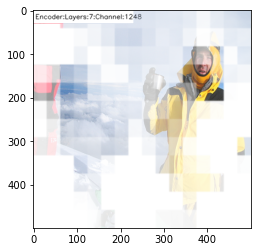

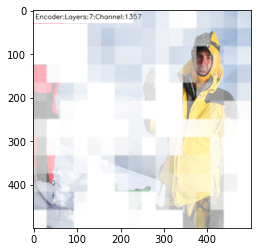

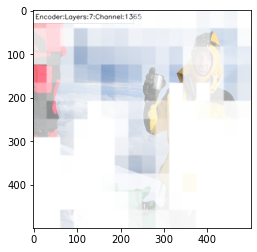

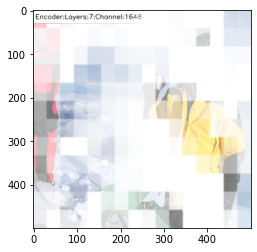

In [11]:
# Window name in which image is displayed
window_name = 'Image'
# text
text_list = ['Encoder:Layers:',':Channel:']
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# orgin
org = (5, 20)
# fontScale
fontScale = 0.5
# Red color in BGR
color = (0, 0, 0, 255)
# Line thickness of 2 px
thickness = 1

# input image
width, height = 500, 500
input_resize = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
input_bgr = cv2.cvtColor(input_resize,cv2.COLOR_RGB2BGR)

for i,array in inter_out :
    idxmax = np.argsort(array[0].sum(axis=(1,2)).numpy())[::-1]
    for i_ in idxmax[:5]:
        img = array[0].numpy()[i_]
        img = (img-img.min())/(img.max()-img.min())
        #img = sktf.pyramid_expand(img, upscale=6, sigma=2)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA)
        img = cv2.GaussianBlur(img,(5,5),0)
        # alpha
        
        dst = cv2.cvtColor(input_resize, cv2.COLOR_RGB2RGBA)
        img = (img-img.min())/(img.max()-img.min())
        img_norm_8U = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        dst[:,:,3] = img_norm_8U
        
        # superposition
        """
        img_c = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        img_norm_8U = cv2.normalize(img_c, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        #dst = cv2.addWeighted(input_bgr,1.0,img_norm_8U,0.8,0)
        dst = cv2.addWeighted(input_resize,1.0,img_norm_8U,0.8,0)
        """
        # add description
        start_point, end_point = (0,0),(230,30)
        text = text_list[0] + str(i) + text_list[1] + str(i_)
        cv2.rectangle(dst, start_point, end_point, (255, 255, 255, 255), cv2.FILLED)
        cv2.putText(dst, text, org, font, fontScale, color, thickness, cv2.LINE_AA, False)
        plt.imshow(dst); plt.show();plt.close()
        #cv2.imshow(window_name, dst)
        cv2.waitKey(0) == ord('q')
# free memory
cv2.destroyAllWindows()